# Plot interattivi, prove ed esempi

## pachages

In [ ]:
!pip install --upgrade numpy pandas cufflinks

# import pandas as pd
# import numpy as np
# import chart_studio.plotly as py
# import cufflinks as cf
# import seaborn as sns
# import plotly.express as px
# import json 
# import os
# import plotly.graph_objects as go
# from datetime import datetime, timedelta
# %matplotlib inline

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
# init_notebook_mode(connected=True)
# cf.go_offline()

In [8]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import plotly.express as px
import cufflinks as cf
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime, timedelta
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


TypeError: <class 'numpy.typing._dtype_like._SupportsDType'> is not a generic class

## Basics


In [2]:

arr_1 = np.random.rand(50,4)
df_1 = pd.DataFrame(arr_1, columns=['A', 'B', 'C', 'D'])
df_1.head()
df_1.iplot()

AttributeError: 'DataFrame' object has no attribute 'iplot'

## Line plots

In [ ]:
import plotly.graph_objects as go
import os

# Imposta il percorso della cartella
cartella = r'C:\Users\MANU\PycharmProjects\ftls_v11-4CLASSES_sensitivity\ftls_events\1992_04_23_T_04_50_23_M61CAL_POST_300\calc_parts'

# Imposta il nome del file CSV
nome_file = 'post_serie.csv'

# Crea il percorso completo al file CSV
percorso_completo = os.path.join(cartella, nome_file)

# Carica il file CSV in un DataFrame
df = pd.read_csv(percorso_completo, index_col=False)
df['last_date'] = pd.to_datetime(df['last_date'])


fig=go.Figure()
fig.add_trace(go.Scatter(x=[df['last_date'].iloc[0], df['last_date'].iloc[-1], df['last_date'].iloc[-1], df['last_date'].iloc[0], df['last_date'].iloc[0]],
                         y=[1, 1, 1.1, 1.1,1], fill='tonexty',mode='lines', line=dict(width=0, color='red'), name='banda'))


fig.add_trace(go.Scatter(x=df['last_date'], y=[1] * len(df), mode='lines', name='b reference', line=dict(color='black')))

fig.add_trace(go.Scatter(x=df['last_date'], y=df['bv_window'], mode='lines', name='bv'))
fig.add_trace(go.Scatter(x=df['last_date'], y=df['b_plus_sigma1'], mode='lines+markers', name='bv+Sigma'))
fig.add_trace(go.Scatter(x=df['last_date'], y=df['b_minus_sigma1'], mode='lines+markers', name='bv-Sigma', 
                        line=dict(color='firebrick', width=2, dash='dashdot')))




# Imposta il template su 'plotly' per lo sfondo bianco e la griglia grigia
fig.update_layout(
    plot_bgcolor='white',  # Sfondo bianco
    xaxis=dict(showgrid=True, gridcolor='grey', showline=True, linecolor='black', linewidth=3, ticks='outside'),  # Griglia nera per l'asse x con contorno
    yaxis=dict(showgrid=True, gridcolor='grey', showline=True, linecolor='black', linewidth=3, ticks='outside'),
    title='b-value temporal serie',
    yaxis_title='bv',
    xaxis_title='Date'# Griglia nera per l'asse y con contorno
)

fig.update_yaxes(range=[0.5, 1.5]) 
fig.update_xaxes(range=[df['last_date'].iloc[0], df['last_date'].iloc[-1]]) 

## Bar Charts 
### ad esempio per plottare il numero di terremoti su un piano piuttosto che sull'altro.

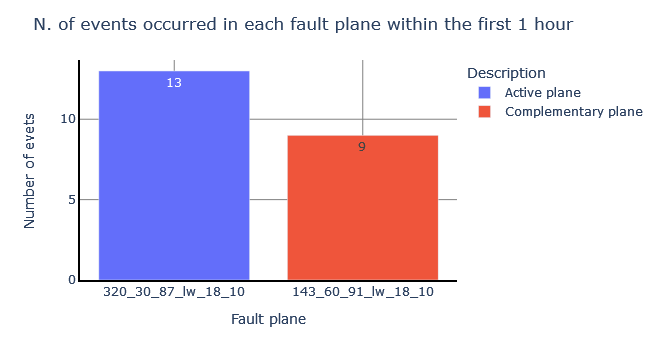

In [29]:
folder = r'C:\Users\MANU\PycharmProjects\ftls_v11-4CLASSES_sensitivity\ftls_events\1983_05_02_T_23_42_38_M67CAL_staking'

def bar_chart_fp(folder):
    def get_isin_col(plane):
        return f"in {plane['name']}"

    import pandas as pd
    import numpy as np
    import plotly.express as px
    import os 
    active_plane_path=os.path.join(folder,'calc_parts','fault_planes.json')

    import json
    with open(active_plane_path, "r") as json_file:
        fault_planes = json.load(json_file)

    cartella = os.path.join(folder, 'catalog')

    # Imposta il nome del file CSV
    nome_file = 'catalog_during_plane_determination_period_1_hr.csv'

    # Crea il percorso completo al file CSV
    percorso_completo = os.path.join(cartella, nome_file)

    # Carica il file CSV in un DataFrame
    soon_evs = pd.read_csv(percorso_completo, index_col=False)


    in_plane_region = soon_evs[get_isin_col(fault_planes[0])]
    nearby_evs_1 = soon_evs[in_plane_region]
    in_plane_region = soon_evs[get_isin_col(fault_planes[1])]
    nearby_evs_2 = soon_evs[in_plane_region]

    fp_list=[fault_planes[0]['name'],fault_planes[1]['name']]
    type_list=[fault_planes[0]['type'],fault_planes[1]['type']]
    strike_list=[fault_planes[0]['strike'],fault_planes[1]['strike']]
    dip_list=[fault_planes[0]['dip'],fault_planes[1]['dip']]
    rake_list=[fault_planes[0]['rake'],fault_planes[1]['rake']]
    num=[len(nearby_evs_1),len(nearby_evs_2)]
    bar_df = pd.DataFrame( columns=['fault plane', 'type', 'strike', 'dip', 'rake', 'num', 'Description'])
    bar_df['fault plane']=fp_list
    bar_df['type']=type_list
    bar_df['strike']=strike_list
    bar_df['dip']=dip_list
    bar_df['rake']=rake_list
    bar_df['num']=num
    bar_df['fault plane'] = bar_df['fault plane'].str.replace('faultplane_srd_', '')
    indice_max_num = bar_df['num'].idxmax()

    # Trova l'indice della riga con il valore 'num' più basso
    indice_min_num = bar_df['num'].idxmin()

    # Assegna "Active plane" alla colonna 'description' per la riga con num maggiore
    bar_df.at[indice_max_num, 'Description'] = 'Active plane'

    # Assegna "Complementary plane" alla colonna 'description' per la riga con num inferiore
    bar_df.at[indice_min_num, 'Description'] = 'Complementary plane'

    fig=px.bar(bar_df, x='fault plane', y='num', text='num', color='Description',  labels={'fault plane': 'Fault plane', 'num': 'Number of evets'}, barmode='relative')

    fig.update_layout(
        plot_bgcolor='white',  # Sfondo bianco
        xaxis=dict(showgrid=True, gridcolor='grey', showline=True, linecolor='black', linewidth=2),  # Griglia nera per l'asse x con contorno
        yaxis=dict(showgrid=True, gridcolor='grey', showline=True, linecolor='black', linewidth=2),  # Griglia nera per l'asse y con contorno
        title= 'N. of events occurred in each fault plane within the first 1 hour'
    )
    fig.show()
    
bar_chart_fp(folder)

## Scatter plot
### per rappresentare la magnitudo dei terremoti rispetto alla data 


In [ ]:
# dati necessari 
# catalogo prima ora, catalogo post 
folder = r'C:\Users\MANU\PycharmProjects\ftls_v11-4CLASSES_sensitivity\ftls_events\1983_05_02_T_23_42_38_M67CAL_staking'

def scatter_plot_evs(folder):
    import plotly.graph_objects as go
    import os
    import pandas as pd
    import json
    from datetime import datetime, timedelta
    active_plane_path=os.path.join(folder,'calc_parts','active_planes.json')
    # Apri il file in modalità lettura e carica il contenuto come oggetto Python
    with open(active_plane_path, "r") as json_file:
        active_plane = json.load(json_file)

    with open(os.path.join(folder,'config', 'main_event.json'), "r") as json_file:
        mainevt = json.load(json_file)

        mainevent = pd.Series(mainevt)
        mainevent['fulldate'] = datetime(**mainevent[['year', 'day', 'month', 'hour', 'minute']].astype(int).to_dict()
                                         ) + timedelta(seconds=mainevent.at['second'])
    ap_name=active_plane['name']
    # soon evs 
    nome_file = 'catalog_during_plane_determination_period_1_hr.csv'

    # Crea il percorso completo al file CSV
    percorso_completo = os.path.join(folder,'catalog', nome_file)

    # Carica il file CSV in un DataFrame
    soon_evs = pd.read_csv(percorso_completo, index_col=False)


    def get_isin_col(plane):
        return f"in {plane['name']}"

    in_plane_region = soon_evs[get_isin_col(active_plane)]
    nearby_evs_1 = soon_evs[in_plane_region]
    nearby_evs_1['fulldate'] = pd.to_datetime(nearby_evs_1['fulldate'])
    nearby_evs_1['Time window']='Events in the first hour'
    # Crea il percorso completo al file CSV
    percorso_completo = os.path.join(folder,'calc_parts',active_plane['name']+'_post_cat.csv' )

    # Carica il file CSV in un DataFrame
    post_cat = pd.read_csv(percorso_completo, index_col=False)
    post_cat['fulldate'] = pd.to_datetime(post_cat['fulldate'])
    reference_date = mainevent['fulldate'] + pd.DateOffset(days=3)

    # Crea la colonna "Color" in base alla condizione
    post_cat['Time window'] = np.where(post_cat['fulldate'] < reference_date, 'Events in the first 3 days', 'Events after 3 days')
    merged_df = pd.concat([nearby_evs_1, post_cat], axis=0)

    # Reset dell'indice, se necessario
    merged_df.reset_index(drop=True, inplace=True)

    # fig=go.Figure()
    # fig.add_trace(go.Scatter(x=merged_df['fulldate'], y=merged_df['mag'], mode='markers', marker_color=merged_df['Color'] ))

    fig=px.scatter(merged_df, x='fulldate', y='mag', color='Time window',labels={'fulldate': 'Date', 'mag': 'Magnitude'}, size='mag')
    fig.add_shape(
        go.layout.Shape(
            type="line",
            x0=mainevent['fulldate'],
            x1=mainevent['fulldate'],
            y0=0,
            y1=10,
            line=dict(color="black", width=3, dash='dash')
        )
    )

    fig.add_trace(
        go.Scatter(
            x=[mainevent['fulldate']],
            y=[mainevent['mag']],
            mode="markers",
            marker=dict(symbol="star", size=20, color="firebrick"),
            name='Main event'

        )
    )
    fig.update_layout(
        plot_bgcolor='white',  # Sfondo bianco
        xaxis=dict(showgrid=True, gridcolor='grey', showline=True, linecolor='black', linewidth=2),  # Griglia nera per l'asse x con contorno
        yaxis=dict(showgrid=True, gridcolor='grey', showline=True, linecolor='black', linewidth=2),  # Griglia nera per l'asse y con contorno
        title= 'Magnitude vs Time'
    )

    fig.update_yaxes(range=[1, mainevent['mag']+0.5]) 
    fig.update_xaxes(range=[mainevent['fulldate']-pd.DateOffset(hours=3), mainevent['fulldate']+pd.DateOffset(days=7)]) 
    fig.show()

scatter_plot_evs(folder)



## 3D scatter plot

In [ ]:
def plot_box_3d(folder):
    import os
    import pandas as pd
    import json
    from datetime import datetime, timedelta
    active_plane_path=os.path.join(folder,'calc_parts','active_planes.json')
    # Apri il file in modalità lettura e carica il contenuto come oggetto Python
    with open(active_plane_path, "r") as json_file:
        active_plane = json.load(json_file)

    with open(os.path.join(folder,'config', 'main_event.json'), "r") as json_file:
        mainevt = json.load(json_file)

        mainevent = pd.Series(mainevt)
        mainevent['fulldate'] = datetime(**mainevent[['year', 'day', 'month', 'hour', 'minute']].astype(int).to_dict()
                                         ) + timedelta(seconds=mainevent.at['second'])
    ap_name=active_plane['name']
    # soon evs 
    nome_file = 'catalog_during_plane_determination_period_1_hr.csv'

    # Crea il percorso completo al file CSV
    percorso_completo = os.path.join(folder,'catalog', nome_file)

    # Carica il file CSV in un DataFrame
    soon_evs = pd.read_csv(percorso_completo, index_col=False)


    def get_isin_col(plane):
        return f"in {plane['name']}"

    in_plane_region = soon_evs[get_isin_col(active_plane)]
    nearby_evs_1 = soon_evs[in_plane_region]
    nearby_evs_1['fulldate'] = pd.to_datetime(nearby_evs_1['fulldate'])
    nearby_evs_1['Time window']='Events in the first hour'
    # Crea il percorso completo al file CSV
    percorso_completo = os.path.join(folder,'calc_parts',active_plane['name']+'_post_cat.csv' )

    # Carica il file CSV in un DataFrame
    post_cat = pd.read_csv(percorso_completo, index_col=False)
    post_cat['fulldate'] = pd.to_datetime(post_cat['fulldate'])
    reference_date = mainevent['fulldate'] + pd.DateOffset(days=3)

    # Crea la colonna "Color" in base alla condizione
    post_cat['Time window'] = np.where(post_cat['fulldate'] < reference_date, 'Events in the first 3 days', 'Events after 3 days')
    merged_df = pd.concat([nearby_evs_1, post_cat], axis=0)

    # Reset dell'indice, se necessario
    merged_df.reset_index(drop=True, inplace=True)

    fig = px.scatter_3d(merged_df, x='lon', y='lat', z='depth', color='mag', opacity=0.7)
    fig.update_scenes(zaxis=dict(range=[merged_df['depth'].max(), merged_df['depth'].min()]))
    fig.update_traces(marker=dict(size=2))
    line_trace = go.Scatter3d(
        x=active_plane['lon'] + [active_plane['lon'][0]],  # Aggiungi il primo elemento alla fine per chiudere il poligono
        y=active_plane['lat'] + [active_plane['lat'][0]],  # Aggiungi il primo elemento alla fine per chiudere il poligono
        z=active_plane['depth'] + [active_plane['depth'][0]],  # Aggiungi il primo elemento alla fine per chiudere il poligono
        mode='lines',
        line=dict(color='red', width=3),  # Personalizza colore e spessore della linea
        name='Active plane'

    )

    fig.add_trace(line_trace)
    polygon_trace = go.Mesh3d(
        x=active_plane['lon'] + [active_plane['lon'][0]],  # Aggiungi il primo elemento alla fine per chiudere il poligono
        y=active_plane['lat'] + [active_plane['lat'][0]],  # Aggiungi il primo elemento alla fine per chiudere il poligono
        z=active_plane['depth'] + [active_plane['depth'][0]],  # Aggiungi il primo elemento alla fine per chiudere il poligono
        opacity=0.5,  # Imposta l'opacità del colore
        color='red'  # Imposta il colore di riempimento del poligono
    )

    # Aggiungi la traccia del poligono al grafico
    fig.add_trace(polygon_trace)
    fig.update_layout(
    plot_bgcolor='white',  # Sfondo bianco
    xaxis=dict(showgrid=True, gridcolor='grey', showline=True, linecolor='black', linewidth=2),  # Griglia nera per l'asse x con contorno
    yaxis=dict(showgrid=True, gridcolor='grey', showline=True, linecolor='black', linewidth=2),  # Griglia nera per l'asse y con contorno
    title= '3D box'
    )
    fig.show()

In [ ]:

folder = r'C:\Users\MANU\PycharmProjects\ftls_v11-4CLASSES_sensitivity\ftls_events\1983_05_02_T_23_42_38_M67CAL_staking'
plot_box_3d(folder)


## b value time serie

In [ ]:
def temporal_series_b(folder):
    import plotly.graph_objects as go
    import os
    import os
    import pandas as pd
    import json
    from datetime import datetime, timedelta

    # Imposta il percorso della cartella

    # Imposta il nome del file CSV
    nome_file = 'post_serie.csv'

    # Crea il percorso completo al file CSV
    percorso_completo = os.path.join(folder,'calc_parts', nome_file)

    # Carica il file CSV in un DataFrame
    df = pd.read_csv(percorso_completo, index_col=False)
    df['last_date'] = pd.to_datetime(df['last_date'])

    with open(os.path.join(folder,'calc_parts', 'PRE_general_results.json'), "r") as json_file:
        PRE_results = json.load(json_file)


    with open(active_plane_path, "r") as json_file:
        active_plane = json.load(json_file)
    
    with open(os.path.join(folder,'config', 'main_event.json'), "r") as json_file:
        mainevt = json.load(json_file)

        mainevent = pd.Series(mainevt)
        mainevent['fulldate'] = datetime(**mainevent[['year', 'day', 'month', 'hour', 'minute']].astype(int).to_dict()
                                         ) + timedelta(seconds=mainevent.at['second'])



    ap_name=active_plane['name']
    pre_data=PRE_results[f"{active_plane['name']}"]
    if not np.isnan(pre_data['b_reference_from_ts']):
        b_ref=pre_data['b_reference_from_ts']
    else:
        b_ref = pre_data['b_unic']

    fig=go.Figure()
    # banda colorata
    b_ref_90=b_ref*0.9
    b_ref_110=b_ref*1.1

    fig.add_trace(go.Scatter(x=[mainevent['fulldate'], df['last_date'].iloc[-1], df['last_date'].iloc[-1],mainevent['fulldate'],mainevent['fulldate']],
                             y=[0, 0, b_ref_90, b_ref_90,0], fill='toself',mode='lines', line=dict(width=0, color='red'), name='<90%'))
    fig.add_trace(go.Scatter(x=[mainevent['fulldate'], df['last_date'].iloc[-1], df['last_date'].iloc[-1], mainevent['fulldate'], mainevent['fulldate']],
                             y=[b_ref_90, b_ref_90, b_ref, b_ref,b_ref_90], fill='toself',mode='lines', line=dict(width=0, color='orange'), name='90-100%'))

    fig.add_trace(go.Scatter(x=[mainevent['fulldate'], df['last_date'].iloc[-1], df['last_date'].iloc[-1], mainevent['fulldate'], mainevent['fulldate']],
                             y=[b_ref, b_ref, b_ref_110, b_ref_110,b_ref], fill='toself',mode='lines', line=dict(width=0, color='yellow'), name='100-110%'))
    fig.add_trace(go.Scatter(x=[mainevent['fulldate'], df['last_date'].iloc[-1], df['last_date'].iloc[-1], mainevent['fulldate'], mainevent['fulldate']],
                             y=[b_ref_110, b_ref_110, 3, 3,b_ref_110], fill='toself',mode='lines', line=dict(width=0, color='green'), name='>110%'))

    # linea ref
    fig.add_trace(go.Scatter(x=[mainevent['fulldate'], df['last_date'].max()],
                             y=[b_ref, b_ref], mode='lines', name='b reference', line=dict(color='black')))




    fig.add_trace(go.Scatter(x=df['last_date'], y=df['bv_window'], mode='lines', name='bv',
                             line=dict(color='blue', width=2, dash='solid')))
    fig.add_trace(go.Scatter(x=df['last_date'], y=df['b_plus_sigma1'], mode='lines', name='bv+Sigma',
                             line=dict(color='grey', width=2, dash='dot')))
    fig.add_trace(go.Scatter(x=df['last_date'], y=df['b_minus_sigma1'], mode='lines', name='bv-Sigma', 
                            line=dict(color='grey', width=2, dash='dot')))




    # Imposta il template su 'plotly' per lo sfondo bianco e la griglia grigia
    fig.update_layout(
        plot_bgcolor='white',  # Sfondo bianco
        xaxis=dict(showgrid=True, gridcolor='grey', showline=True, linecolor='black', linewidth=3, ticks='outside'),  # Griglia nera per l'asse x con contorno
        yaxis=dict(showgrid=True, gridcolor='grey', showline=True, linecolor='black', linewidth=3, ticks='outside'),
        title='b-value temporal serie (first 3 days)',
        yaxis_title='bv',
        xaxis_title='Date'# Griglia nera per l'asse y con contorno
    )
    fig.add_annotation(
        text=f'b reference: {b_ref}',  # Testo da mostrare
        xref='paper',  # Riferimento x (in questo caso, carta)
        yref='paper',  # Riferimento y (in questo caso, carta)
        x=0.5,  # Coordinata x della casella di testo (tra 0 e 1)
        y=0.9,  # Coordinata y della casella di testo (tra 0 e 1)
        showarrow=False,  # Non mostrare la freccia
        font=dict(size=20, color="black")

    )

    fig.update_yaxes(range=[0.5, 1.5]) 
    fig.update_xaxes(range=[mainevent['fulldate'], mainevent['fulldate'] + pd.DateOffset(days=3)]) 
    fig.show()
    
################    
folder = r'C:\Users\MANU\PycharmProjects\ftls_v11-4CLASSES_sensitivity\ftls_events\1983_05_02_T_23_42_38_M67CAL_staking'
temporal_series_b(folder)

## plot valori in percentuale 

In [ ]:
folder = r'C:\Users\MANU\PycharmProjects\ftls_v11-4CLASSES_sensitivity\ftls_events\1983_05_02_T_23_42_38_M67CAL_staking'

def alert_status_plot(folder):
    import plotly.graph_objects as go
    import os
    import pandas as pd
    import json
    from datetime import datetime, timedelta
    import plotly.express as px

    # Imposta il percorso della cartella

    # Imposta il nome del file CSV
    nome_file = 'post_serie.csv'

    # Crea il percorso completo al file CSV
    percorso_completo = os.path.join(folder,'calc_parts', nome_file)

    # Carica il file CSV in un DataFrame
    post_data = pd.read_csv(percorso_completo, index_col=False)
    post_data['last_date'] = pd.to_datetime(post_data['last_date'])

    with open(os.path.join(folder,'calc_parts', 'PRE_general_results.json'), "r") as json_file:
        PRE_results = json.load(json_file)


    with open(active_plane_path, "r") as json_file:
        active_plane = json.load(json_file)

    with open(os.path.join(folder,'config', 'main_event.json'), "r") as json_file:
        mainevt = json.load(json_file)

        mainevent = pd.Series(mainevt)
        mainevent['fulldate'] = datetime(**mainevent[['year', 'day', 'month', 'hour', 'minute']].astype(int).to_dict()
                                         ) + timedelta(seconds=mainevent.at['second'])



    ap_name=active_plane['name']
    pre_data=PRE_results[f"{active_plane['name']}"]
    if not np.isnan(pre_data['b_reference_from_ts']):
        b_ref=pre_data['b_reference_from_ts']
    else:
        b_ref = pre_data['b_unic']


    ##########################################################
    time_interval = pd.Timedelta(hours=12)
    time_interval_g = pd.Timedelta(hours=12)
    max_values = pd.DataFrame()
    min_values = pd.DataFrame()
    start_date_v = mainevent['fulldate']
    start_date_g = start_date_v
    p_max_lim=int(np.max(np.concatenate((np.array([130]), np.array([np.max(post_data['B_perc'])]))))+5)
    p_min_lim=int(np.min(np.concatenate((np.array([70]), np.array([np.min(post_data['B_perc'])]))))-5)


    while start_date_v+time_interval <= post_data['last_date'].max()+pd.Timedelta(hours=1):
            # seleziona i dati a partire dalla data di partenza e fino a 12 ore dopo
            filtered_data =post_data[
                (post_data['last_date'] >= start_date_v) & (post_data['last_date'] < start_date_v + time_interval)].reset_index(drop=True)

            filtered_data_gcheck=post_data[(post_data['last_date'] >= start_date_g)
                                             & (post_data['last_date'] < start_date_g + time_interval_g)].reset_index(drop=True)



            if filtered_data_gcheck['B_perc'].max()>110:
                max_value = pd.DataFrame({
                    'fulldate': [start_date_g + time_interval_g],
                    'b_perc': [filtered_data_gcheck['B_perc'].max()]
                })

                min_value = pd.DataFrame({
                    'fulldate': [start_date_v + time_interval],
                    'b_perc': [filtered_data['B_perc'].median()]
                })
            else:
                # calcola il massimo della colonna "b_perc"
                max_value = pd.DataFrame({
                    'fulldate': [start_date_g + time_interval_g],
                    'b_perc': [filtered_data_gcheck['B_perc'].max()]
                })
                min_value = pd.DataFrame({
                    'fulldate': [start_date_v+ time_interval],
                    'b_perc': [filtered_data['B_perc'].median()]
                })

            # aggiungi il massimo alla lista
            max_values = pd.concat([max_values, max_value])
            max_values = max_values.dropna(subset=['b_perc'], axis=0)
            min_values = pd.concat([min_values, min_value])
            min_values = min_values.dropna(subset=['b_perc'], axis=0)

            # incrementa la data di partenza di 12 ore
            time_interval += pd.Timedelta(hours=12)
            start_date_g += time_interval_g

    def assign_color(row):
        if row['b_perc'] >= 110:
            return 'b > 110%'
        elif row['b_perc'] >= 90 and row['b_perc'] <=100:
            return '90% < b < 100%'
        elif row['b_perc'] > 100 and row['b_perc'] <=110:
            return '100% < b < 110%'
        elif row['b_perc'] < 90:
            return 'b < 90%'
    max_values['Alert status'] = max_values.apply(assign_color, axis=1)
    max_values = max_values.reset_index(drop=True)


    ##########################################################
    # fig.add_trace(go.Scatter(x=[mainevent['fulldate'],  post_data['last_date'].max()],
    #                         y=[100, 100], mode='lines', name='b reference', line=dict(color='black')))
    # fig.add_trace(go.Scatter(x=[mainevent['fulldate'],  post_data['last_date'].max()],
    #                         y=[110, 110], mode='lines', name='b reference', line=dict(color='green')))
    # Crea il tuo plot
    fig = px.scatter(max_values, x='fulldate', y='b_perc', color='Alert status', color_discrete_map={
        'b > 110%': 'green',
        '90% < b < 100%': 'orange',
        '100% < b < 110%': 'yellow',
        'b < 90%': 'red'
    })
    fig.update_traces(
        marker=dict(size=15, line=dict(width=2, color='black'))
    )




    fig.add_trace(go.Scatter(x=[mainevent['fulldate'], post_data['last_date'].max()],
                            y=[100, 100], mode='lines', name='b reference', line=dict(color='black', dash='dash')))

    fig.add_trace(go.Scatter(x=[mainevent['fulldate'], post_data['last_date'].max()],
                            y=[110, 110], mode='lines', name='b=110%', line=dict(color='green')))
    fig.add_trace(go.Scatter(x=[mainevent['fulldate'], post_data['last_date'].max()],
                            y=[90, 90], mode='lines', name='b=90%', line=dict(color='red')))

    fig.update_traces(
        marker=dict(size=15, line=dict(width=2, color='black'))
    )


    # Aggiungi un titolo
    fig.update_layout(title='Alert status')
    fig.update_layout(
        plot_bgcolor='white',  # Sfondo bianco
        xaxis=dict(showgrid=True, gridcolor='grey', showline=True, linecolor='black', linewidth=3, ticks='outside'),  # Griglia nera per l'asse x con contorno
        yaxis=dict(showgrid=True, gridcolor='grey', showline=True, linecolor='black', linewidth=3, ticks='outside'),
        title='b-value temporal serie (first 3 days)',
        yaxis_title='b%',
        xaxis_title='Date'# Griglia nera per l'asse y con contorno
    )
    # Mostra il grafico
    start_date = mainevent['fulldate']

    # Calcola la data di fine aggiungendo 3 mesi
    end_date = start_date + pd.DateOffset(months=3)

    # Calcola il numero di ticks necessari (ogni 12 ore)
    num_ticks = int((end_date - start_date).total_seconds() / 3600 / 12) + 1

    # Genera i valori dei ticks
    tick_values = pd.date_range(start=start_date, periods=num_ticks, freq='12H')
    tick_labels = [tick.strftime('%Y-%m-%d %H:%M') for tick in tick_values]
    fig.update_xaxes(
        tickvals=tick_values,
        ticktext=tick_labels,
        tickangle=-45
    )

    fig.update_xaxes(range=[mainevent['fulldate'], mainevent['fulldate'] + pd.DateOffset(days=3.1)]) 
    fig.update_yaxes(range=[p_min_lim, p_max_lim])
    fig.show()

alert_status_plot(folder)  
    
    



In [28]:
folder = r'C:\Users\MANU\PycharmProjects\ftls_v11-4CLASSES_sensitivity\ftls_events\1983_05_02_T_23_42_38_M67CAL_staking'
earthquake='Coalinga'


def table_specific(folder, earthquake):
    import numpy as np
    nome_file = 'post_serie.csv'

    # Crea il percorso completo al file CSV
    percorso_completo = os.path.join(folder,'calc_parts', nome_file)

    post_data = pd.read_csv(percorso_completo, index_col=False)
    post_data['last_date'] = pd.to_datetime(post_data['last_date'])

    first_3_days = post_data[post_data['last_date'] <= post_data['last_date'].min() + pd.Timedelta(days=3)]

    # Trova il massimo valore di B_perc nei primi 3 giorni
    b_max3 = first_3_days['B_perc'].max()

    first_7_days = post_data[post_data['last_date'] <= post_data['last_date'].min() + pd.Timedelta(days=7)]
    b_max7 = first_7_days['B_perc'].max()

    first_30_days = post_data[post_data['last_date'] <= post_data['last_date'].min() + pd.Timedelta(days=30)]
    b_max30 = first_30_days['B_perc'].max()

    first_90_days = post_data[post_data['last_date'] <= post_data['last_date'].min() + pd.Timedelta(days=90)]
    b_max90 = first_90_days['B_perc'].max()

    with open(os.path.join(folder,'config', 'main_event.json'), "r") as json_file:
        mainevt = json.load(json_file)

        mainevent = pd.Series(mainevt)
        mainevent['fulldate'] = datetime(**mainevent[['year', 'day', 'month', 'hour', 'minute']].astype(int).to_dict()
                                         ) + timedelta(seconds=mainevent.at['second'])

    active_plane_path = os.path.join(folder, 'calc_parts', 'active_planes.json')
    # Apri il file in modalità lettura e carica il contenuto come oggetto Python
    with open(active_plane_path, "r") as json_file:
        active_plane = json.load(json_file)

    ap_name = active_plane['name']

    with open(os.path.join(folder, 'calc_parts', 'PRE_general_results.json'), "r") as json_file:
        PRE_results = json.load(json_file)
    pre_data = PRE_results[f"{active_plane['name']}"]
    if not np.isnan(pre_data['b_reference_from_ts']):
        b_ref = pre_data['b_reference_from_ts']
    else:
        b_ref = pre_data['b_unic']
    import numpy as np
    nuova_riga = {
        'Earthquake': earthquake,
        'Date': mainevent['fulldate'],
        'Magnitude': mainevent['mag'],
        'b_ref': b_ref,
        'b-Max3': round(b_max3,2),
        'b-Max7': round(b_max7,2),
        'b-Max30': round(b_max30,2),
        'b-Max90': round(b_max90,2),
        'Strike': active_plane['strike'],
        'Dip': active_plane['dip'],
        'Rake': active_plane['rake'],
        'Fault type': active_plane['type']
    }
    df_nuova_riga = pd.DataFrame([nuova_riga])
    return df_nuova_riga

df_nuova_riga=table_specific(folder, earthquake)
from IPython.display import display, Markdown
df_nuova_riga = df_nuova_riga.to_markdown(index=False)
display(Markdown(df_nuova_riga))

| Earthquake   | Date                       |   Magnitude |   b_ref |   b-Max3 |   b-Max7 |   b-Max30 |   b-Max90 |   Strike |   Dip |   Rake | Fault type   |
|:-------------|:---------------------------|------------:|--------:|---------:|---------:|----------:|----------:|---------:|------:|-------:|:-------------|
| Coalinga     | 1983-05-02 23:42:38.060000 |         6.7 |    0.75 |   128.54 |   128.54 |    136.32 |    136.32 |      320 |    30 |     87 | TH           |

In [24]:
from IPython.display import display, Markdown
df_nuova_riga = df_nuova_riga.to_markdown(index=False)
display(Markdown(df_nuova_riga))

| Earthquake   | Date                       |   Magnitude |   b_ref |   b-Max3 |   b-Max7 |   b-Max30 |   b-Max90 |   Strike |   Dip |   Rake | Fault type   |
|:-------------|:---------------------------|------------:|--------:|---------:|---------:|----------:|----------:|---------:|------:|-------:|:-------------|
| Coalinga     | 1983-05-02 23:42:38.060000 |         6.7 |    0.75 |   128.54 |   128.54 |    136.32 |    136.32 |      320 |    30 |     87 | TH           |

In [ ]:
max_B_perc_in_first_3_days


In [18]:
100+((0.75-1.2)/1.2)*100

55.00000000000001